# Building a Model to Predict Employee Attrition

- In order to do this, we will consider an example dataset.
- In this dataset, we have the information of several anonymous employees.
- The columns hold several attributes about the employees like age, monthly income, etc.,
- We also have a column attrition which will be our target variable.

- Let's first start by understanding the dataset. Inorder to do this we have to perform exploratory data analysis.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

dataset_path = "/Users/konaesther/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls"
df = pd.read_csv(dataset_path)

### Display first five rows

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Retrieve information about the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Get various statistical information about the columns

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for Missing Values

In [43]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Now let us procees towards visualising the different parameters that affect an employees attrition.

## Using Visualisation to Get a Better Understanding Of the Data

### Check the distribution of Attrition, which is the target variable.

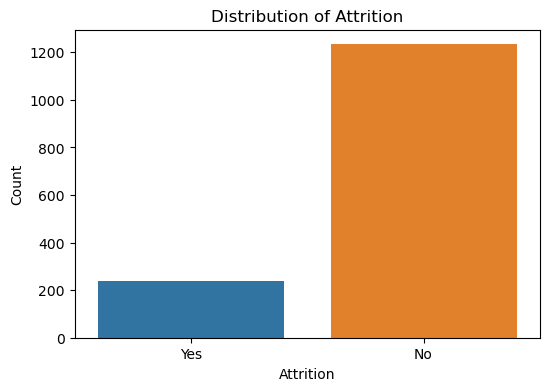

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


### Visualising the Attrition by Employee Age

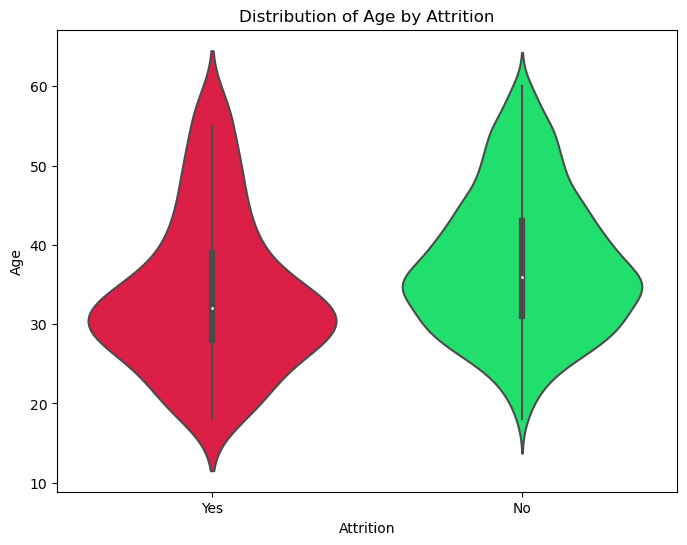

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
colors = ["#FB0033", "#00FF66"]  
sns.violinplot(x='Attrition', y='Age', data=df, palette=colors)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()


### Visualising the Attrition by Monthly Income

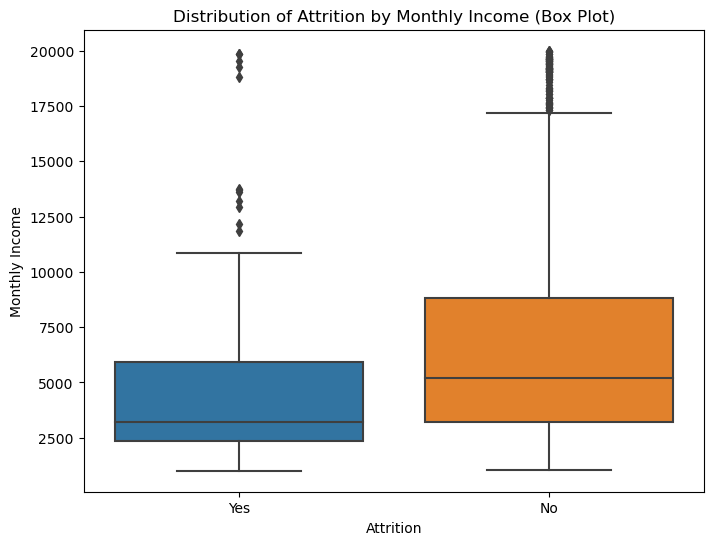

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Define the colors for the box plot
colors = ['#1f77b4', '#ff7f0e']

# Box plot with different colors
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=colors)

# Add title and labels
plt.title('Distribution of Attrition by Monthly Income (Box Plot)')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

# Show the plot
plt.show()


### Visualising the Attrition by the number of years working at the company

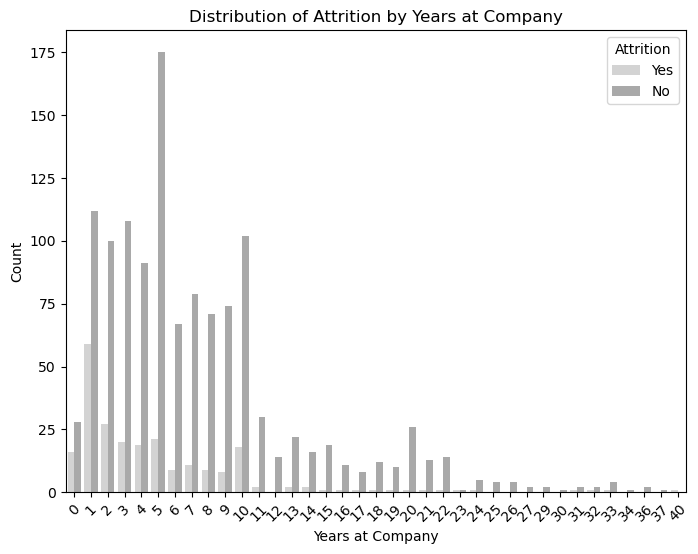

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Define the color palette
colors = ['lightgrey', 'darkgrey', 'black']

# Count plot
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette=colors)

# Add title and labels
plt.title('Distribution of Attrition by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Visualising the Attrition by the Workplace Envirnoment Satisfaction

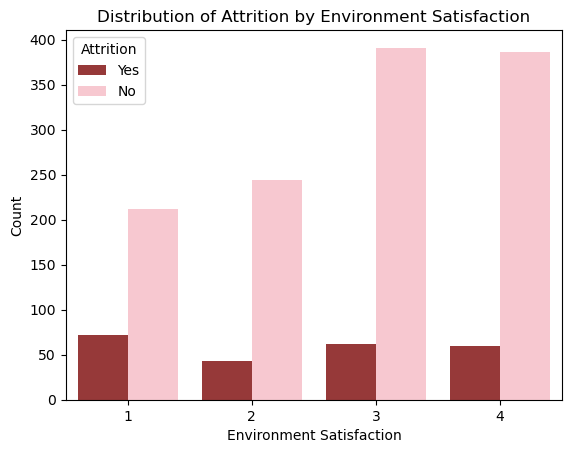

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = ['brown', 'pink']

# Create a count plot
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette=colors)

# Add labels and title
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Attrition by Environment Satisfaction')

# Show the plot
plt.show()


### Visualising the Attrition by the Salary HIke Percentage

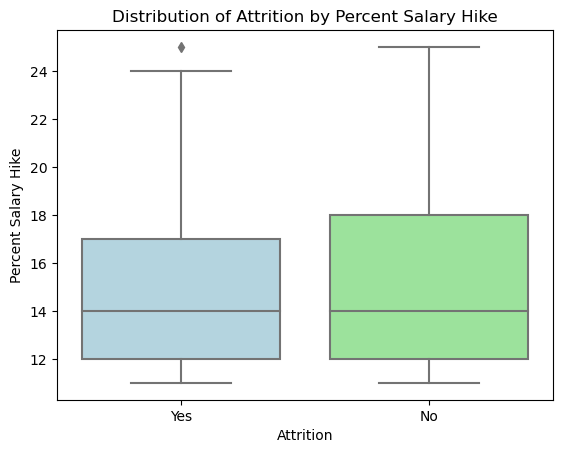

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike', palette=['lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.title('Distribution of Attrition by Percent Salary Hike')

# Show the plot
plt.show()


### Visualising the Attrition by the Year gap between Two Promotions

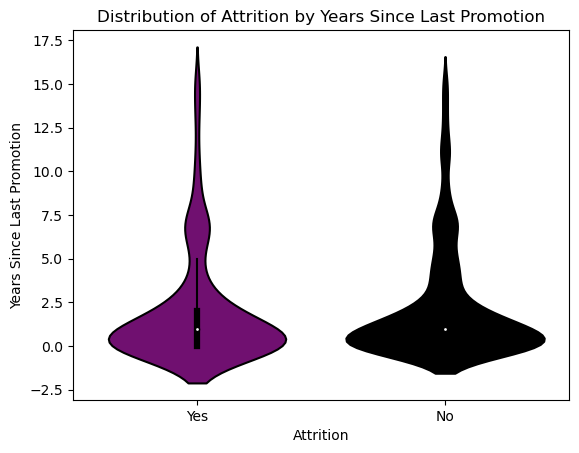

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(data=df, x='Attrition', y='YearsSinceLastPromotion', palette=['purple', 'black'])

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.title('Distribution of Attrition by Years Since Last Promotion')

# Show the plot
plt.show()


### Plotting a Swarm Plot to Visualising the Attrition by Distance of Workplace from Home

/var/folders/v_/q53f3wgx4xzg39kff0sv50700000gn/T/ipykernel_2388/2387576046.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Attrition', y='DistanceFromHome', data=df, palette=['yellow', 'darkgreen'], size=4)
/Users/konaesther/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/konaesther/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


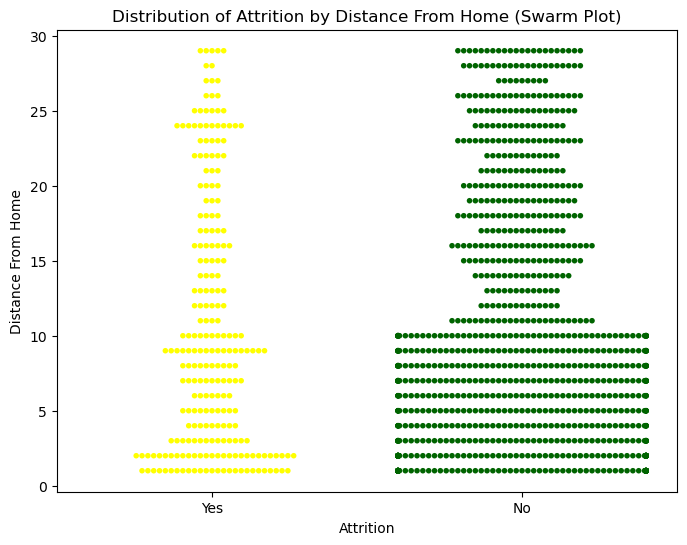

In [37]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Attrition', y='DistanceFromHome', data=df, palette=['yellow', 'darkgreen'], size=4)
plt.title('Distribution of Attrition by Distance From Home (Swarm Plot)')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

### Visualising the Attrition by Employee Overtime Status 

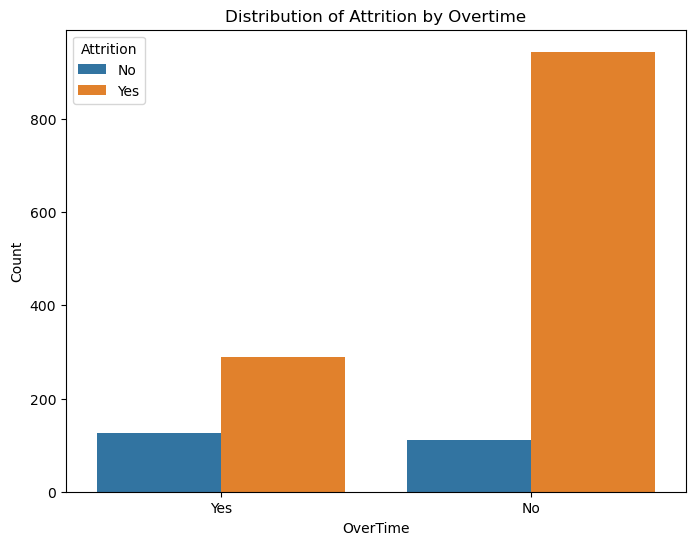

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Attrition by Overtime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


### Visualising the Attrition by Worklife Balance Status

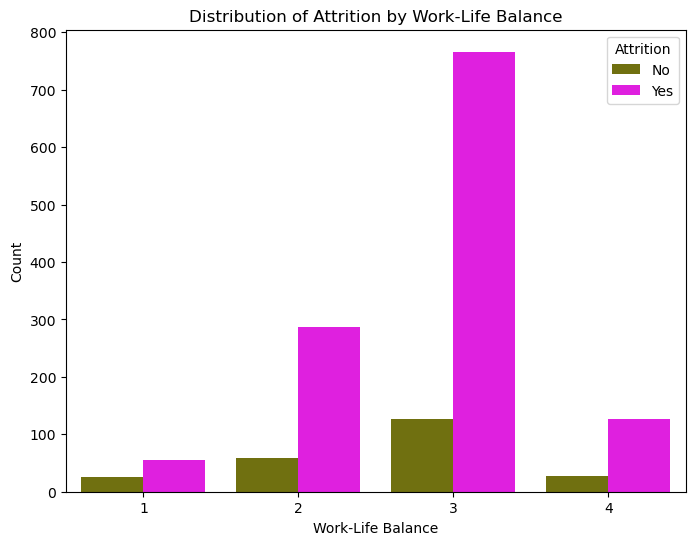

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette=['olive', 'magenta'])
plt.title('Distribution of Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


### Visualising the Attrition by Number of Companies Employee Worked At

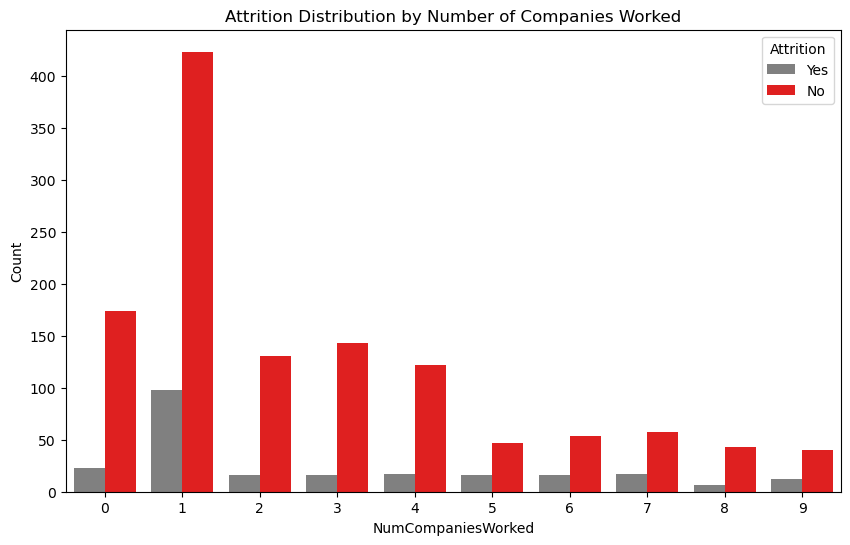

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = ['grey', 'red']

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df, palette=colors)

# Set the title and labels
plt.title('Attrition Distribution by Number of Companies Worked')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count')

# Show the plot
plt.show()


## Observation

- From the visualizations, we understand how attrition of employees is affected by several factors.
- While building our predictive model, we will be using the knowledge derived from the Exploratory Data Analysis that we performed to pick the attributes to be considered in our model.
- We will be using Logistic Regression to build our predictive model which will identify the likelihood of an employee's attrition.
- Attrition refers to the event where an employee quits his job.
- In addition, just to provide an overview, I will also be using Gradient Descent to build the model, solely because of the attention given to it during our classes over the course of this semester.

# Logistic Regression Model to Predict the Attrition of Employees in a Firm

- Let us try to develop a model to predict the attrition of employees.
- Let us first develop a logistic regression model for it.

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

dataset_path = "/Users/konaesther/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls"
df = pd.read_csv(dataset_path)

- Let us print the first few rows to get an idea of the columns and data

In [108]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- Let us determine the number of rows present in the given data set

In [109]:
len(df)

1470

- Retrieving some information about variables, data types, and missing values

In [110]:
variable_info = df.info()
variable_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Our data has no missing values. To recheck, we can do as below :

In [111]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Remove the target variable from the dataframe

In [112]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

### Perform One-Hot Encoding for the categorical variables

- We use pandas.get_dummies() to do this.

In [113]:
# Apply one-hot encoding using pandas.get_dummies()
X_encoded = pd.get_dummies(X)

### Split the dataset into training data and testing data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Create an instance of logistic regression model

In [115]:
logreg_model = LogisticRegression()

### Fitting the logistic regression model on the training data

In [116]:
logreg_model.fit(X_train, y_train)

/Users/konaesther/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Upon fitting, it shows us a warning. To overcome this we can increase the number of iterations or we can also scale the variables. Let us do the latter.

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression()

- Voila! We got rid of the warning. Now let us proceed to making predictions on the test data

In [118]:
y_pred = logreg_model.predict(X_test_scaled)

### Calculating accuracy, prediction, recall and F1 score for the logistic regression model

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Yes')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Yes')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8843537414965986
Precision: 0.5806451612903226
Recall: 0.46153846153846156
F1-score: 0.5142857142857143


## Visualising the ROC curve

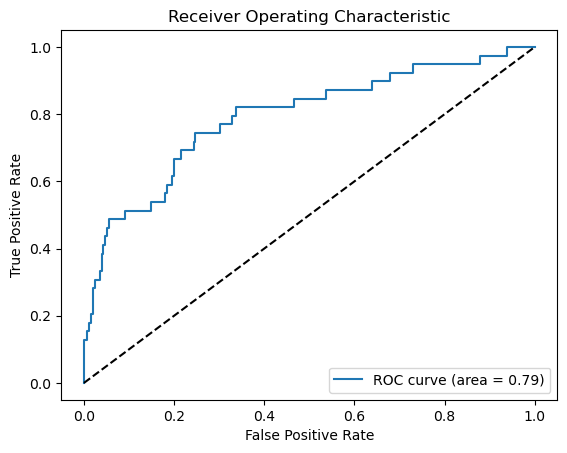

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Convert 'No' and 'Yes' labels to 0 and 1
y_test_binary = np.where(y_test == 'Yes', 1, 0)

# Calculate predicted probabilities for the positive class ('Yes')
y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the Area Under the Curve (AUC) score
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Precision Recall Curve

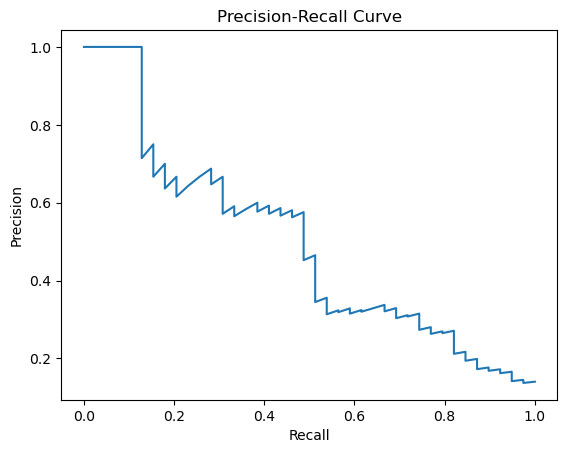

In [122]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Confusion Matrix

/Users/konaesther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

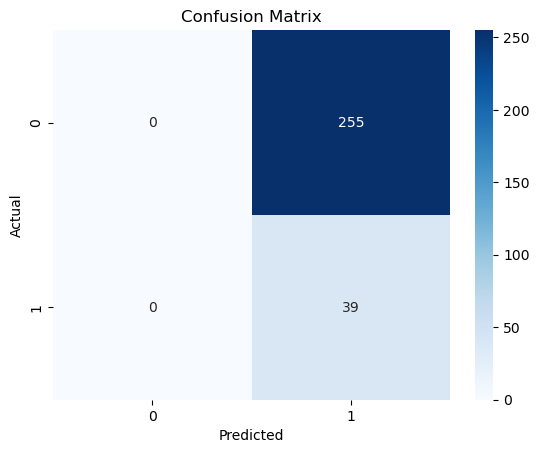

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions using the trained logistic regression model
y_pred = logreg_model.predict(X_test)
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
# a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


## Feature Importance

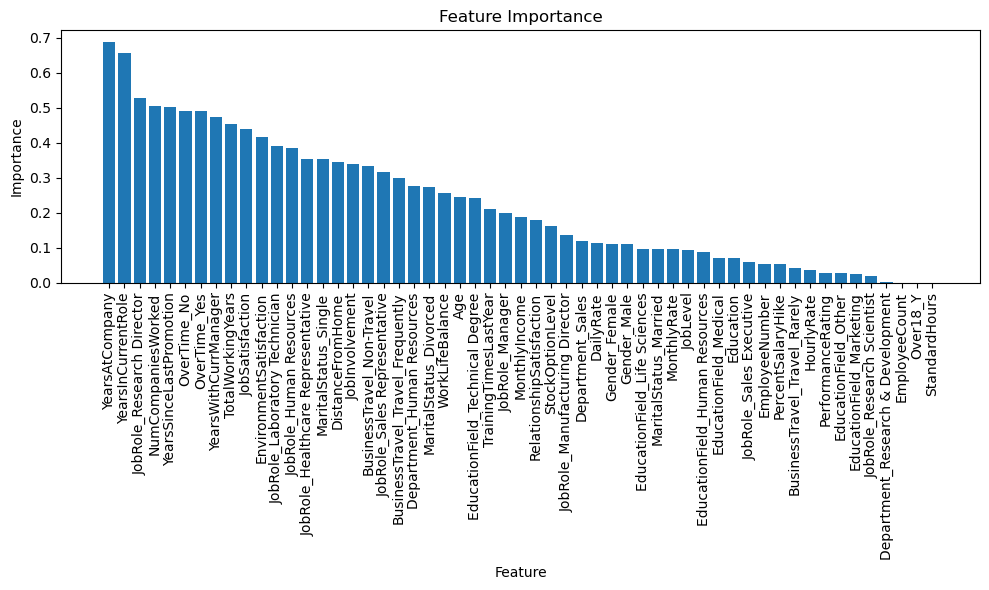

In [124]:
import numpy as np
import matplotlib.pyplot as plt

feature_importance = np.abs(logreg_model.coef_[0])
feature_names = X_encoded.columns
indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[indices]
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_feature_importance)
plt.xticks(range(len(feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


- As we can see, we have incorporated all the features in this model. We shall cut down the features in the next iteration when we use another algorithm to predict.

## Coefficient Plot

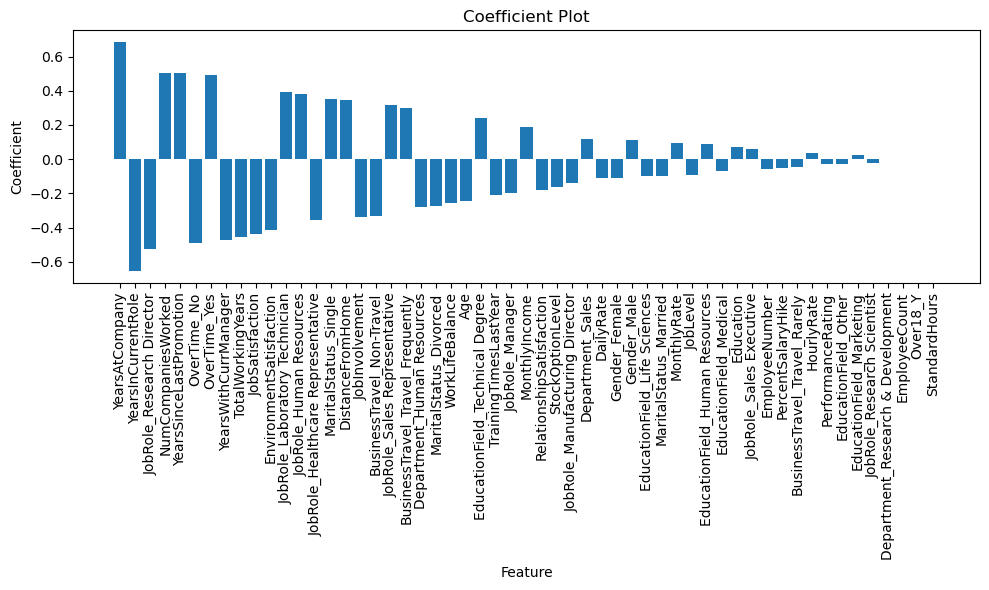

In [125]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = logreg_model.coef_[0]
feature_names = X_encoded.columns
indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[indices]
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), sorted_coefficients)
plt.xticks(range(len(coefficients)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficient Plot')
plt.tight_layout()
plt.show()


## Caliberation Plot

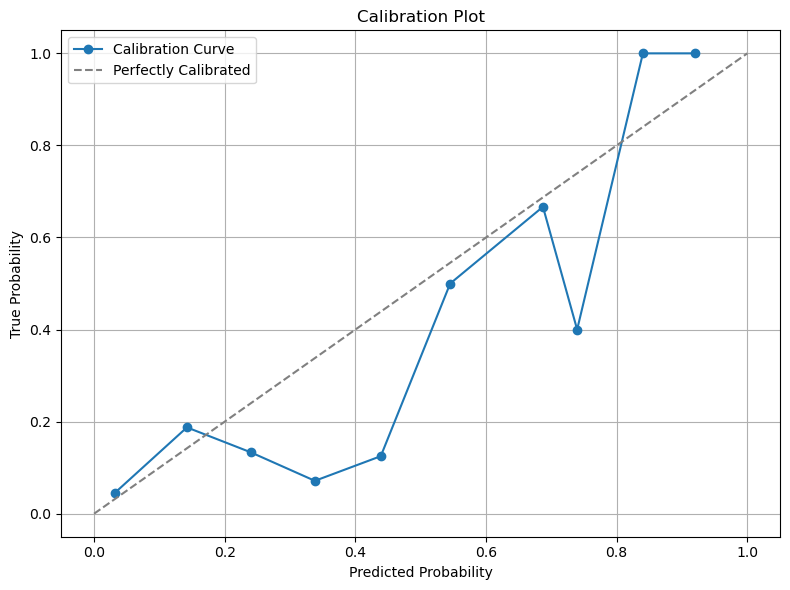

In [126]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
true_prob, pred_prob = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(pred_prob, true_prob, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend(['Calibration Curve', 'Perfectly Calibrated'])
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Matrix

In [127]:
import pandas as pd

df = pd.read_csv(dataset_path)
correlation_matrix = df.corr()
print(correlation_matrix)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

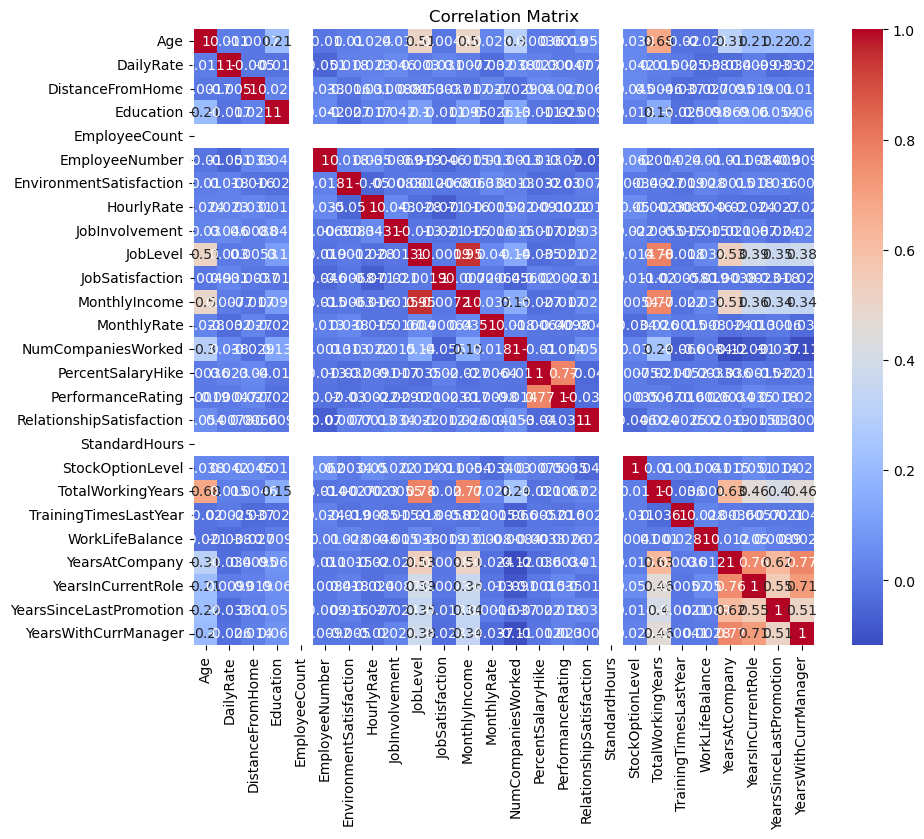

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- In order to further improve our model, we can perform hyperparameter tuning.
- We can use any one of the follwing :
- Grid search, random search, or Bayesian optimization can be used to systematically search through the hyperparameter space and find the best values.
- We will be using Grid search

## Hyperparameter tuning using Grid Search

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8843537414965986


- There is not much of a difference despite using the hyperparameter tuning.
- I will also be showing a contrast when using a different algorithm to create a predictive model.
- Let us use the Random Forest Algorithm to draw a contrast.

# Random Forest Algorithm To Improve The Prediction Model

- Now let us select only a few relevant features from the dataset which show an effect on the prediction.

In [132]:
selected_features = ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Select the desired features from the DataFrame df
X = df[selected_features]
y = df['Attrition']

- We shall again perform the one-hot encoding, splitting of the dataset into training and test data

In [133]:
# one-hot encoding to the selected features
X_encoded = pd.get_dummies(X)
# Split the encoded features and target variable into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [134]:
from sklearn.ensemble import RandomForestClassifier

# instance of Random Forest Classifier
rf_classifier = RandomForestClassifier()
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
y_pred = rf_classifier.predict(X_test)

## Evaluating with metrics

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Yes')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Yes')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("F1-score:", f1)

from sklearn.metrics import roc_auc_score

# Get the predicted probabilities
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_probs)

print("AUC-ROC:", auc_roc)

Accuracy: 0.8639455782312925
Precision: 0.42857142857142855
Recall: 0.07692307692307693
F1-score: 0.13043478260869565
AUC-ROC: 0.7456510809451986


- The accuracy is less than the logistic regression model.

## Confusion Matrix

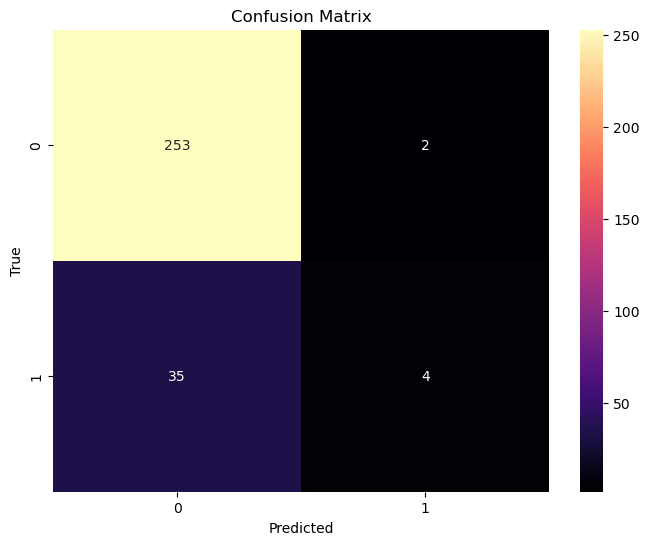

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- Althoght we notice that the accuracy for this model is reduced, the other metrics have shown an improvement.
- Accuracy is not the sole metrics to measure the quality of the prediction model

In [102]:
selected_features = ['MonthlyIncome', 'OverTime', 'Age', 'TotalWorkingYears', 'MonthlyRate',
                     'HourlyRate', 'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike',
                     'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobSatisfaction',
                     'EnvironmentSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
                     'RelationshipSatisfaction']
# Select the desired features from the DataFrame df
X = df[selected_features]
y = df['Attrition']

In [103]:
# one-hot encoding to the selected features
X_encoded = pd.get_dummies(X)
# Split the encoded features and target variable into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestClassifier

# instance of Random Forest Classifier
rf_classifier = RandomForestClassifier()
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_pred = rf_classifier.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Yes')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Yes')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("F1-score:", f1)

from sklearn.metrics import roc_auc_score

# Get the predicted probabilities
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_probs)

print("AUC-ROC:", auc_roc)

Accuracy: 0.8605442176870748
Precision: 0.4
Recall: 0.10256410256410256
F1-score: 0.163265306122449
AUC-ROC: 0.7412770236299648


## Contrasting results for Logistic Regression Model and Random Forest Algorithm

- The accuracy value for logistic regression model is more than the one we used Random Forest Algorithm.
- It depends on the datasets and upon the classification problem about which model works better. 
- It is necessary to perform all steps of data preprocessing before performing the subsequent steps.

# Results

- Our model correctly predicted the attrition for approximately 88.44% of the samples in the test set.
-  50% of the samples predicted as positive by the model are actually true positives.